In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [46]:
path = r"C:\Users\gagan\Desktop\Mission Robosoft\Datasets\crop_yield.csv"
df = pd.read_csv(path)

In [47]:
df.iloc[:, :4].head(5)

,Crop,Crop_Year,Season,State
0,Arecanut,1997,Whole Year,Assam
1,Arhar/Tur,1997,Kharif,Assam
2,Castor seed,1997,Kharif,Assam
3,Coconut,1997,Whole Year,Assam
4,Cotton(lint),1997,Kharif,Assam


In [48]:
df.iloc[:, 4:8].head(5)

,Area,Production,Annual_Rainfall,Fertilizer
0,73814.0,56708,2051.4,7024878.38
1,6637.0,4685,2051.4,631643.29
2,796.0,22,2051.4,75755.32
3,19656.0,126905000,2051.4,1870661.52
4,1739.0,794,2051.4,165500.63


In [49]:
df.iloc[:, 8:].head(5)

,Pesticide,Yield
0,22882.34,0.796087
1,2057.47,0.710435
2,246.76,0.238333
3,6093.36,5238.051739
4,539.09,0.420909


In [50]:
df.nunique()

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [53]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [54]:
df.describe(include = 'object')

,Crop,Season,State
count,19689,19689,19689
unique,55,6,30
top,Rice,Kharif,Karnataka
freq,1197,8232,1432


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [56]:
df.nunique()

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64

In [57]:
df['Crop_Year'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [58]:
#How have crop production trends evolved across different European countries over the last 15 years
crop_production_trend = df[(df['Crop_Year'] > 2005) & (df['Crop_Year'] <= 2020)].groupby(['Crop_Year', 'Crop'])['Production'].sum()
crop_production_trend.reset_index().sort_values(by = ['Crop_Year', 'Production'], ascending = [True, False])

,Crop_Year,Crop,Production
9,2006,Coconut,15067607265
45,2006,Sugarcane,334295217
39,2006,Rice,92023239
52,2006,Wheat,70106630
11,2006,Cotton(lint),20764043
...,...,...,...
768,2020,Moth,24
770,2020,Other Rabi pulses,21
767,2020,Moong(Green Gram),11
783,2020,Tobacco,6


<Axes: title={'center': 'Close Look'}, xlabel='Crop_Year,Crop'>

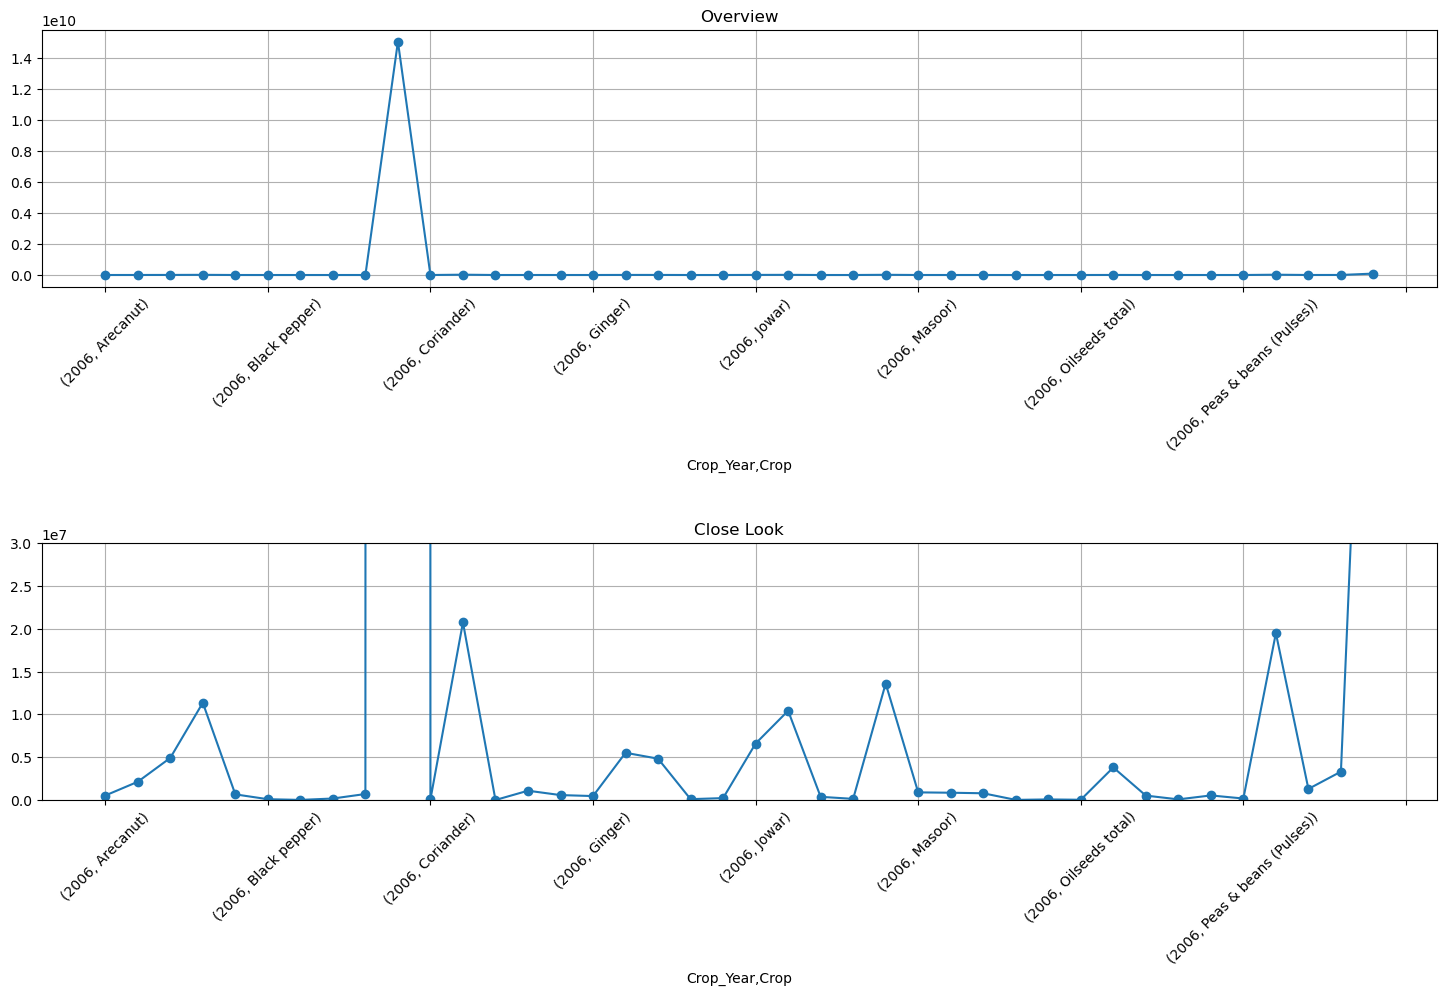

In [59]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
plt.subplots_adjust(hspace = 1.0)
crop_production_trend[:40].plot(kind = 'line', rot = 45, grid = True, marker = 'o', ax = axes[0], title = 'Overview')
crop_production_trend[:40].plot(kind = 'line', rot = 45, grid = True, marker = 'o', ylim = (0, 30000000), ax = axes[1], title = 'Close Look')

In [60]:
#What are the key factors influencing yield variations across different regions
yield_variations = df[(df['Crop_Year'] == 2020)].groupby(['State', 'Crop', 'Annual_Rainfall', 'Fertilizer', 'Pesticide'])['Yield'].mean()
yield_variations.reset_index().sort_values(by = ['Annual_Rainfall', 'Yield'], ascending = [False, False])[:5]

,State,Crop,Annual_Rainfall,Fertilizer,Pesticide,Yield
27,Uttarakhand,Sugarcane,1313.947826,17460524.24,33368.08,81.540000
12,Uttarakhand,Onion,1313.947826,695059.90,1328.30,14.184615
18,Uttarakhand,Potato,1313.947826,1050721.47,2007.99,11.830000
19,Uttarakhand,Potato,1313.947826,1165532.20,2227.40,9.942000
2,Uttarakhand,Garlic,1313.947826,1034845.45,1977.65,6.603478


In [62]:
#Which crops have demonstrated the highest resilience to seasonal changes
crop_yield = df.groupby(['Crop_Year', 'Crop', 'Annual_Rainfall'])['Yield'].mean().reset_index()
crop_resilience = df.groupby('Crop')['Yield'].std().reset_index()
crop_resilience.columns = ['Crop', 'Yield_Std_Dev']
crop_resilience = crop_resilience.sort_values(by='Yield_Std_Dev', ascending=True)

In [63]:
print(crop_yield[:5])

   Crop_Year      Crop  Annual_Rainfall     Yield
0       1997  Arecanut           1266.7  1.293571
1       1997  Arecanut           1852.9  1.691765
2       1997  Arecanut           2051.4  0.796087
3       1997  Arecanut           3252.4  1.147857
4       1997  Arecanut           3818.2  1.245714


In [64]:
print(crop_resilience[:5]) 
#here calculated Yield_Std_Dev per crop – lower values indicate more resilience.

          Crop  Yield_Std_Dev
23     Linseed       0.223668
19  Horse-gram       0.225087
22     Khesari       0.228552
41   Safflower       0.237030
25      Masoor       0.239129


<Axes: xlabel='Crop_Year,State,Annual_Rainfall'>

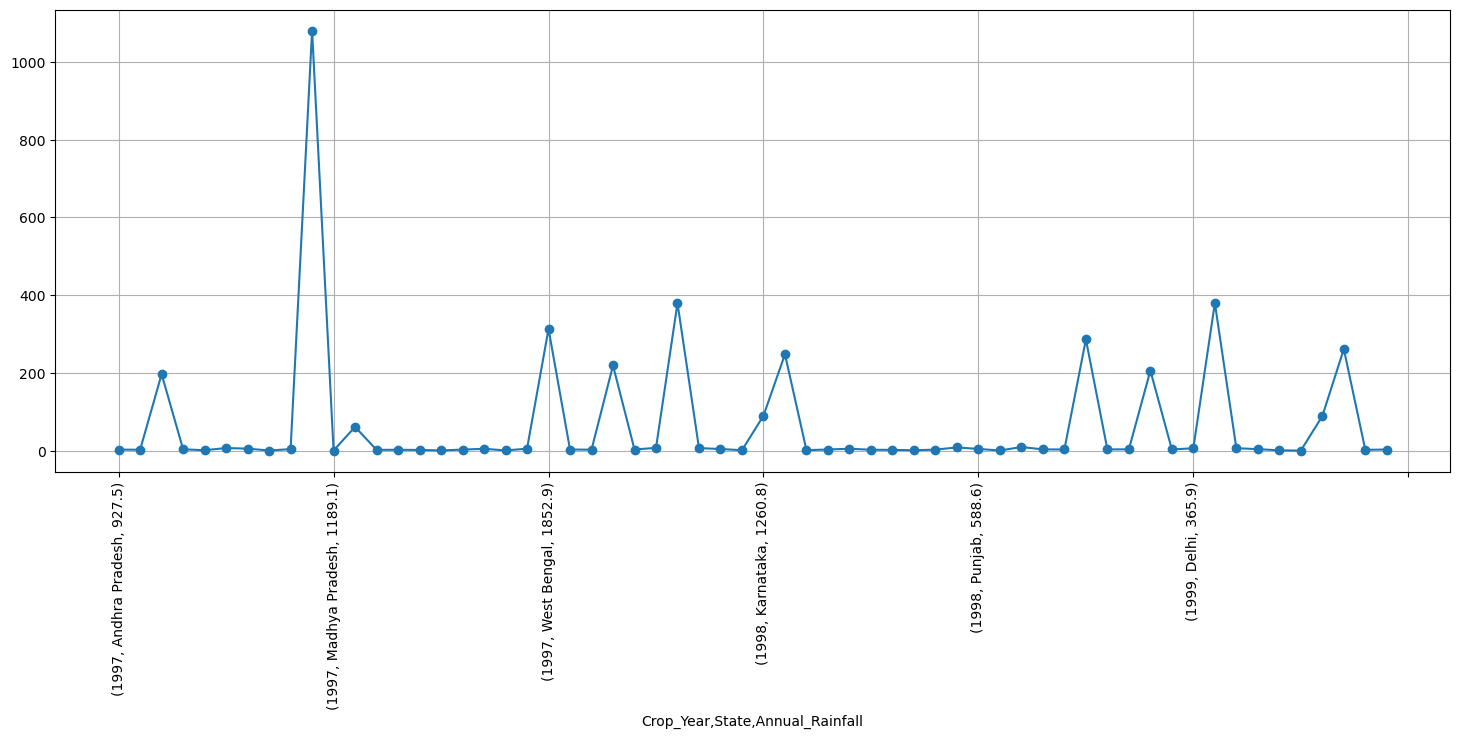

In [77]:
#How does rainfall variability affect crop production in different countries
df.groupby(['Crop_Year', 'State', 'Annual_Rainfall'])['Yield'].mean()[:60].plot(kind = 'line', figsize = (18, 6), rot = 90, marker = 'o', grid = True)

In [78]:
#What is the correlation between fertilizer usage and yield efficiency
df['Fertilizer'].corr(df['Yield'])

0.0028618642682307085

<Axes: xlabel='State'>

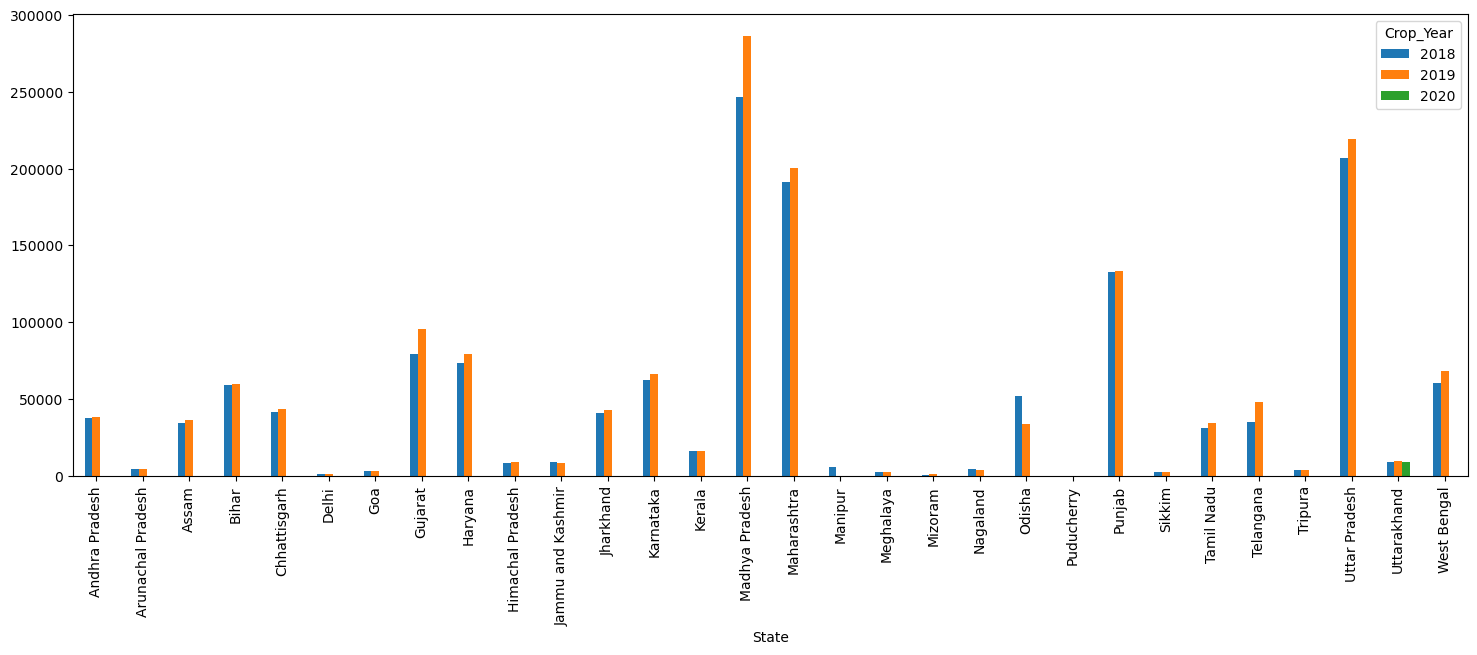

In [ ]:
#Are there significant shifts in pesticide usage trends across seasons and regions?
df[(df['Crop_Year'] > 2017)].groupby(['Crop_Year', 'State'])['Pesticide'].mean().unstack('Crop_Year').plot(kind = "bar", figsize = (18, 6))

In [114]:
#Which crops are most sensitive to fluctuations in rainfall and climate
crop_fluctuations = df[(df['Crop_Year']  == 2017)].groupby(['Crop_Year', 'Annual_Rainfall', 'Crop'])['Yield'].mean()
crop_fluctuations.reset_index().sort_values(by = ['Crop_Year', 'Annual_Rainfall'], ascending = [True, True])

,Crop_Year,Annual_Rainfall,Crop,Yield
0,2017,417.1,Arhar/Tur,1.108333
1,2017,417.1,Bajra,1.690476
2,2017,417.1,Barley,3.711333
3,2017,417.1,Castor seed,1.000000
4,2017,417.1,Coriander,2.690588
...,...,...,...,...
821,2017,4472.3,Sweet potato,3.694545
822,2017,4472.3,Tapioca,7.553636
823,2017,4472.3,Tobacco,1.055000
824,2017,4472.3,Turmeric,5.915455


<Axes: xlabel='Crop_Year,Annual_Rainfall,Crop'>

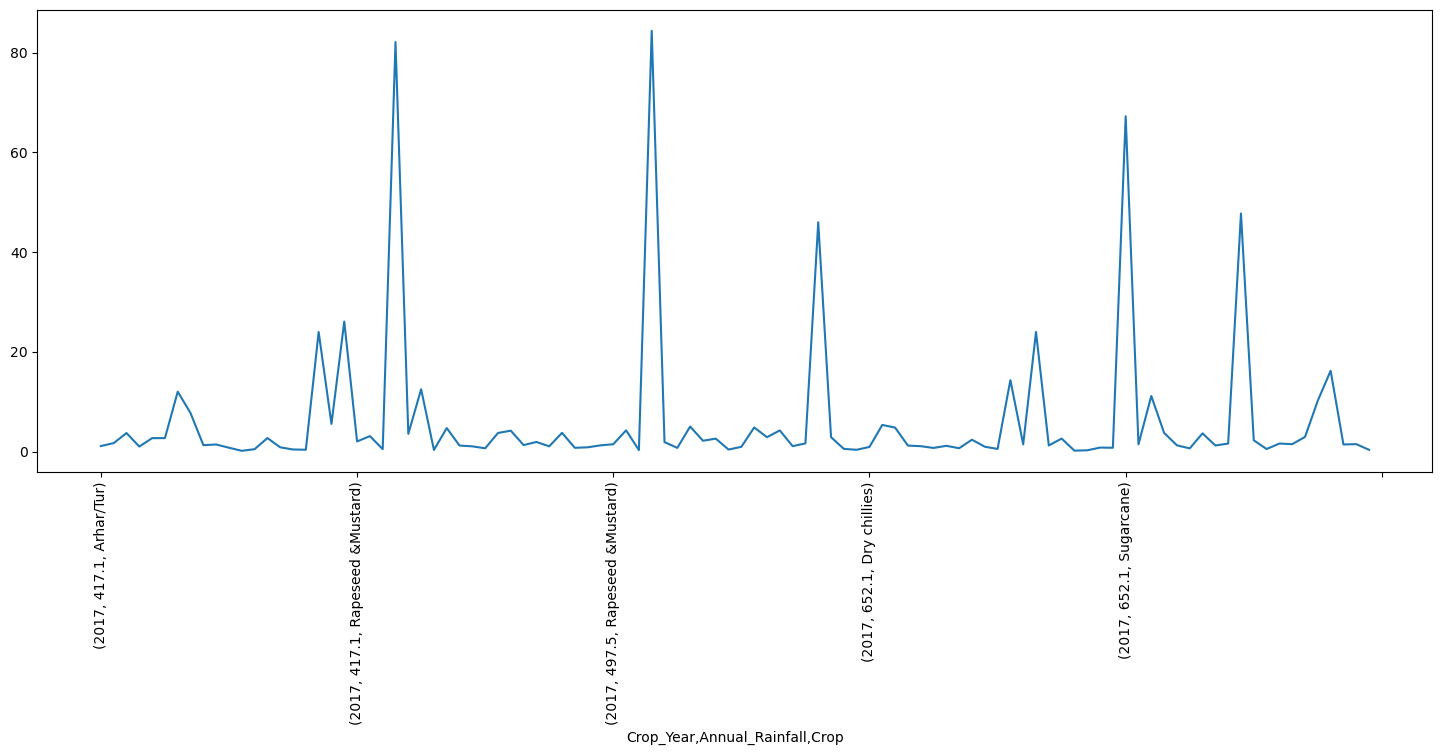

In [115]:
crop_fluctuations[:100].plot(kind = "line", figsize= (18, 6), rot = 90)